## Managed Inference

[Go to Api Tokens page (Log in if necessary)](https://console.deci.ai/settings/api-tokens). Copy `Temporary Access Token` (valid for 1 week):

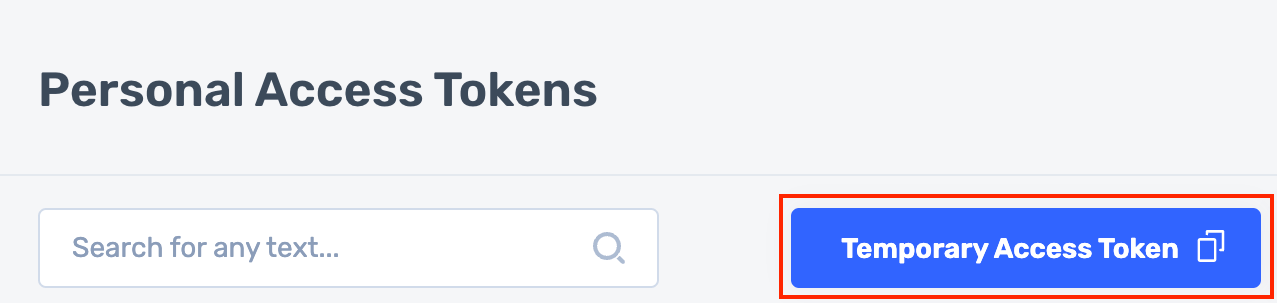

In [ ]:
# No Quotes!
%set_env ACCESS_TOKEN=...

[Go to Workspace page](https://console.development.deci.ai/settings/workspace). Copy `Workspace Id`:

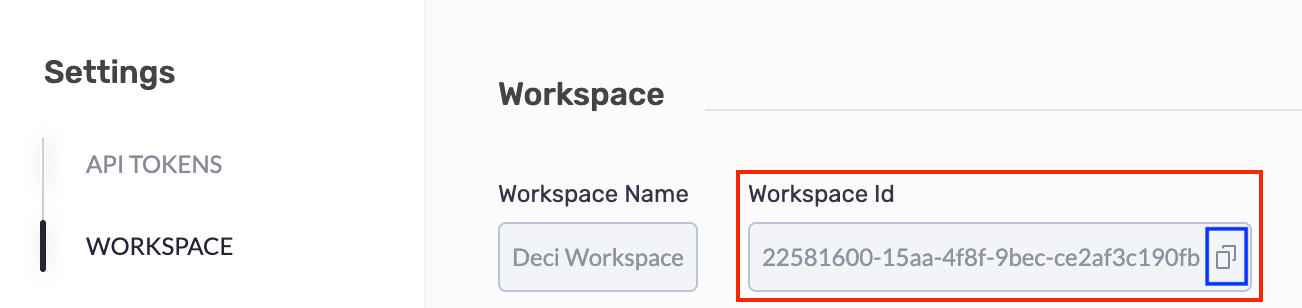

In [ ]:
# No Quotes!
%set_env WORKSPACE_ID=...

### Prompting Deci-Nano:

The Deci-hosted endpoints are OpenAI compatible. The cURL command below may be used with any OpenAI compatible server.

In [ ]:
%%bash
export MODEL_NAME="deci-nano"
curl -s "https://api.deci.ai/serving/llm/$MODEL_NAME/chat/completions" -H "Authorization: Bearer $ACCESS_TOKEN" -H "x-deci-workspace: $WORKSPACE_ID" -H "Content-type: application/json" \
    -d '{
        "model": "deci-nano",
        "messages": [{"role":"system","content":"You are a world class chef."},
                     {"role":"user","content":"Generate a list of keywords for a series of blog posts on vegan recipes."}],
        "temperature": 0.01,
        "max_tokens": 50,
        "stream": false}
    ' | python -m json.tool

### Prompting DeciCoder-6B With Streaming:

Two things to notice:
 1. Since this is a coding model and not an instruction tuned model, passing anything but a single `user` prompt will throw an error.
 2. Jupyter flushes the entire stream at once. In other environments, the result will be incrementally returned.

In [ ]:
%%bash
export MODEL_NAME="deci-coder-6b"
curl -s "https://api.deci.ai/serving/llm/$MODEL_NAME/chat/completions" -H "Authorization: Bearer $ACCESS_TOKEN" -H "x-deci-workspace: $WORKSPACE_ID" -H "Content-type: application/json" \
    -d '{
        "model": "deci-coder-6b",
        "messages": [{"role":"user","content":"def factorial(x: int) -> int:"}],
        "temperature": 0.1,
        "max_tokens": 100,
        "stream": true
    }'

### Prompting Deci-Nano using the OpenAI Python client

First, you must install the OpenAI python package:

In [ ]:
! pip install openai

Now use the OpenAI client normally. Notice the need for passing the `x-deci-workspace` extra header.

In [ ]:
import os
from openai import OpenAI


oai = OpenAI(api_key=os.environ.get("ACCESS_TOKEN"), base_url=f"https://api.deci.ai/serving/llm/deci-nano")
response = oai.chat.completions.create(
    model="deci-nano",
    messages=[{"role":"system","content": "You are a world class chef."},
              {"role": "user", "content": "Generate a list of keywords for a series of blog posts on vegan recipes."}],
    temperature=0.01,
    max_tokens=100,
    extra_headers={"x-deci-workspace": os.environ.get("WORKSPACE_ID")}
)
print("\n\n ~~ RESPONSE ~~ \n\n")
print(response.choices[0].message.content)
print("\n\n ~~ USAGE ~~ \n\n")
print(response.usage)